In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist


In [73]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [74]:
# Assuming y_train contains integer labels, convert them to one-hot encoding
num_classes = 10  # Replace with the actual number of classes in your dataset
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

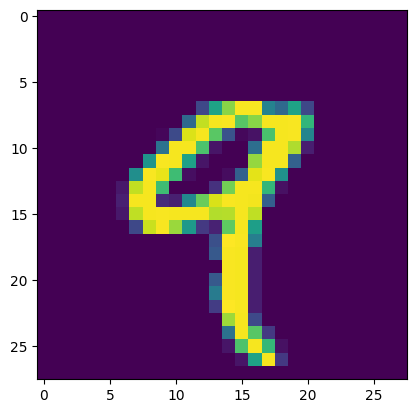

In [75]:
plt.imshow(x_train[4])

In [76]:
x_train[4].shape

(28, 28)

In [67]:
model = Sequential()

model.add(Conv2D(6,kernel_size = (5,5),padding = 'valid', activation = 'tanh', input_shape = (28,28,1)))
model.add(AveragePooling2D(strides = 2,pool_size = (2,2),padding  = 'valid'))

model.add(Conv2D(16, padding = 'valid', kernel_size = (5,5),activation = 'tanh'))
model.add(AveragePooling2D(strides = 2, pool_size = (2,2), padding = 'valid'))

model.add(Flatten())

model.add(Dense(120,activation = 'tanh'))
model.add(Dense(84, activation = 'tanh'))
model.add(Dense(10, activation='softmax'))




In [68]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_17 (Aver  (None, 12, 12, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_18 (Aver  (None, 4, 4, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten_6 (Flatten)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 120)             

In [77]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs = 10,validation_data=(x_test,y_test) )

Epoch 1/100
1875/1875 [==============================] - 30s 15ms/step - loss: 0.1590 - accuracy: 0.9532 - val_loss: 0.0602 - val_accuracy: 0.9812
Epoch 2/100
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0630 - accuracy: 0.9805 - val_loss: 0.0535 - val_accuracy: 0.9842
Epoch 3/100
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0465 - accuracy: 0.9853 - val_loss: 0.0414 - val_accuracy: 0.9871
Epoch 4/100
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0555 - val_accuracy: 0.9820
Epoch 5/100
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.0391 - val_accuracy: 0.9876
Epoch 6/100
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0404 - val_accuracy: 0.9886
Epoch 7/100
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0251 - accuracy: 0.9923 - val_loss: 0